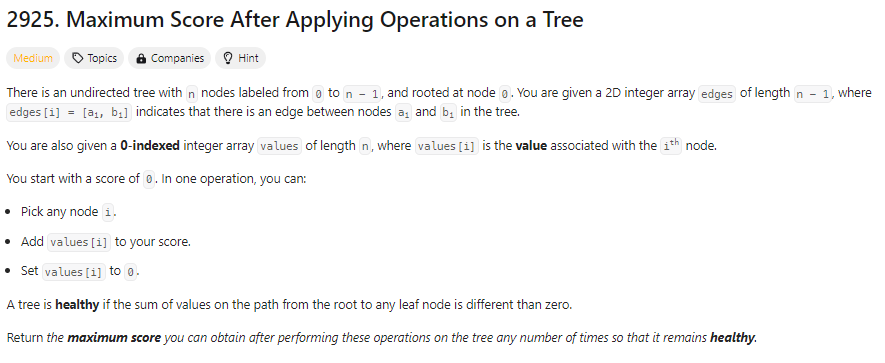

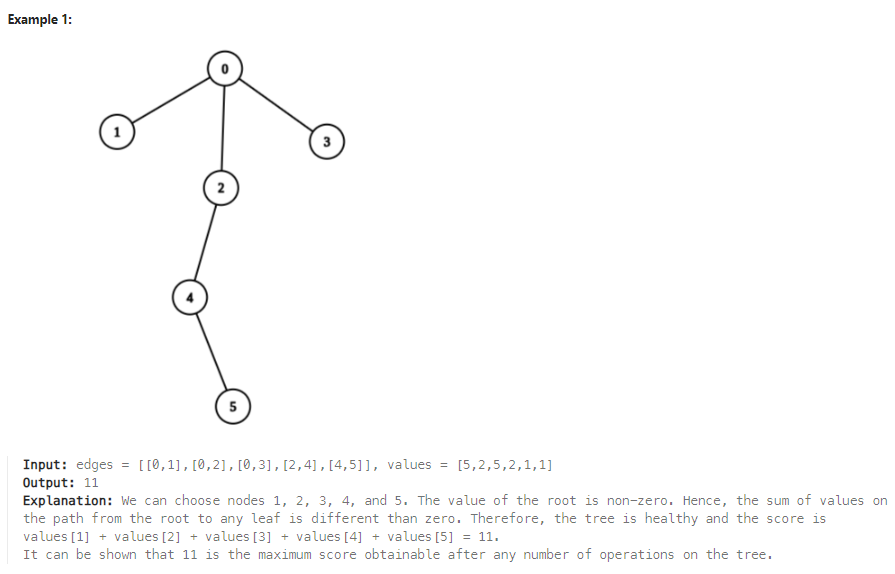
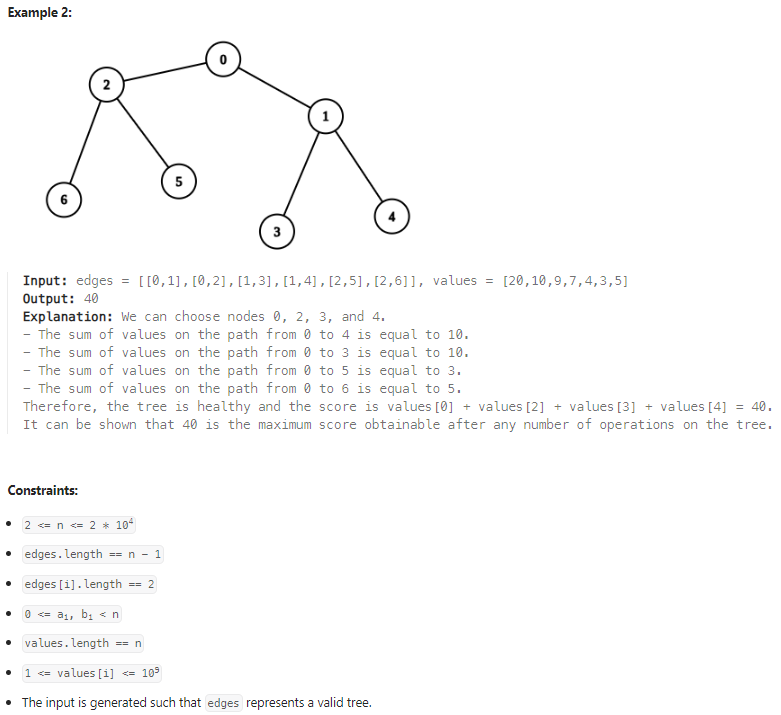

In [1]:
import time
start = time.time()

In [121]:
# at level n, if we take node A, we cant chose any leaves at level n+1 of A, only continue on nodes at level n+1 from branch A

class Solution(object):
    def maximumScoreAfterOperations(self, edges, values):
        current_level = {edges[0][0]: []}
        node_value = values[edges[0][0]]
        # print(current_level, node_value)

        if len(edges) == 1:
            # print(edges[0][0], edges[-1][0])
            if values[edges[0][0]] > values[edges[0][1]]:
                return values[edges[0][0]]
            else:
                return values[edges[0][1]]
        next_level_leaf_sum = 0
        next_level = {}
        recur = []
        for _, edge in enumerate(edges):
            if edge[0] in current_level:
                current_level[edge[0]].append(edge[1])
                next_level[edge[1]] = []

                if edge[1] in [i[0] for i in edges[_+1:]]:
                    # print(edge[1], 'is a node')
                    for j, e in enumerate(edges):
                        if e[0] == edge[1]:
                            print(j, e)
                            recur.append(j)
                            break
                else:
                    # print(edge[1], 'is a leaf', values[edge[1]])
                    next_level_leaf_sum += values[edge[1]]
            else:    
                break
        
        if node_value > next_level_leaf_sum:
            print(1, 'add', node_value)
            if recur:
                s = 0
                for _ in recur:
                    s += self.maximumScoreAfterOperations(edges[_:], values)
                return node_value + s
            else:
                return node_value
        else:
            print(2, 'add', next_level_leaf_sum)
            if recur:
                s = 0
                for _ in recur:
                    s += self.maximumScoreAfterOperations(edges[_:], values)
                    return next_level_leaf_sum + s
            else:
                return next_level_leaf_sum
            
solution = Solution()

In [122]:
#11
solution.maximumScoreAfterOperations(edges = [[0,1],[0,2],[0,3],[2,4],[4,5]], values = [5,2,5,2,1,1]) 

3 [2, 4]
1 add 5
1 [4, 5]
1 add 5


11

In [123]:
solution.maximumScoreAfterOperations([[0,1],[0,2],[1,3],[1,4],[2,5],[2,6]], [20,10,9,7,4,3,5]) 

2 [1, 3]
4 [2, 5]
1 add 20
2 add 11
1 add 9


40